In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df  =pd.read_csv(r'C:\Users\Admin\Desktop\ml model\Data for MSC Thesis\ourproject1.csv')
df.head(15)

,household_id,ea_id,saq01,saq14,pw_w5,adulteq,hh_size,food_cons_ann,nonfood_cons_ann,educ_cons_ann,...,total_cons_ann,nom_foodcons_aeq,nom_nonfoodcons_aeq,nom_educcons_aeq,nom_utilities_aeq,nom_totcons_aeq,spat_totcons_aeq,cons_quint,food_cons2,nonfood_cons2
0,130101088800309122,130101088800309,HARAR,RURAL,18.223164,3.630000,5,171236.000000,15920.0,900,...,193216.000000,47172.453125,4385.675293,247.933899,1421.487671,53227.550781,51118.816406,5,171236.000000,21980.0
1,30518010100101189,30518010100101,AMHARA,URBAN,12997.873047,1.840000,2,86476.000000,31864.0,0,...,131660.000000,52084.785156,17317.392578,0.000000,2152.174072,71554.351562,78529.343750,5,95836.000000,35824.0
2,20305010100306146,20305010100306,AFAR,URBAN,1049.566895,1.860000,2,70044.000000,2160.0,900,...,76944.000000,37658.062500,1161.290283,483.870972,2064.516113,41367.742188,40923.394531,4,70044.000000,6900.0
3,31201088800502010,31201088800502,AMHARA,RURAL,16553.253906,2.710000,4,50570.000000,16532.0,0,...,73642.000000,20963.099609,6100.369141,0.000000,110.701103,27174.169922,30809.851562,4,56810.000000,16832.0
4,71104088800912006,71104088800912,SNNP,RURAL,14842.508789,2.800000,4,60884.940613,2520.0,20,...,63424.941406,21744.621094,900.000000,7.142857,0.000000,22651.765625,25773.101562,3,60884.941406,2540.0
5,40302010100105058,40302010100105,OROMIA,URBAN,10700.541992,3.400000,4,71725.333984,68420.0,50,...,147775.343750,22319.214844,20123.529297,14.705882,1005.882324,43463.335938,46416.152344,5,75885.335938,71890.0
6,130101088800202099,130101088800202,HARAR,RURAL,4.388511,1.880000,2,38161.689331,1946.0,500,...,42407.687500,21128.558594,1035.106445,265.957458,127.659576,22557.281250,21663.621094,2,39721.687500,2686.0
7,140701010700106025,140701010700106,ADDIS ABABA,URBAN,2506.438232,2.660000,3,31356.000000,11948.0,0,...,53344.000000,15111.279297,4491.729492,0.000000,451.127838,20054.136719,19709.361328,2,40196.000000,13148.0
8,70110010100205013,70110010100205,SNNP,URBAN,3343.229736,1.040000,1,129105.601562,4784.0,0,...,188529.593750,174140.015625,4600.000000,0.000000,2538.461670,181278.468750,196845.656250,5,181105.593750,7424.0
9,71201088801101141,71201088801101,SNNP,RURAL,419.892761,3.710000,5,75036.000000,38170.0,50,...,163388.000000,25425.335938,10288.409180,13.477089,8312.667969,44039.890625,50108.437500,5,94328.000000,69060.0


In [7]:
df.tail(12)

,household_id,ea_id,saq01,saq14,pw_w5,adulteq,hh_size,food_cons_ann,nonfood_cons_ann,educ_cons_ann,...,total_cons_ann,nom_foodcons_aeq,nom_nonfoodcons_aeq,nom_educcons_aeq,nom_utilities_aeq,nom_totcons_aeq,spat_totcons_aeq,cons_quint,food_cons2,nonfood_cons2
4947,140707010700732065,140707010700732,ADDIS ABABA,URBAN,853.996094,1.80,2,70096.000000,15730.0,0,...,90046.000000,39953.335938,8738.888672,0.000000,1333.333374,50025.558594,49165.507812,5,71916.000000,18130.0
4948,120205010100101042,120205010100101,GAMBELA,URBAN,21.738203,5.16,6,61366.117798,3360.0,2200,...,66926.117188,11892.659180,651.162781,426.356598,0.000000,12970.177734,13423.227539,1,61366.117188,5560.0
4949,70603010100105249,70603010100105,SNNP,URBAN,5479.566895,3.28,4,187636.933197,24800.0,900,...,217860.937500,58395.406250,7560.975586,274.390259,190.243896,66421.015625,72124.882812,5,191536.937500,26324.0
4950,70702088802709032,70702088802709,SNNP,RURAL,8523.050781,1.88,2,16588.000000,696.0,0,...,18004.000000,8823.405273,370.212799,0.000000,382.978760,9576.596680,10896.218750,1,16588.000000,1416.0
4951,130103088800211079,130103088800211,HARAR,RURAL,410.995819,4.76,5,212805.046387,3078.0,1150,...,219645.046875,45253.164062,646.638672,241.596649,2.521008,46143.917969,44315.816406,4,215405.046875,4240.0
4952,120302088801002088,120302088801002,GAMBELA,RURAL,204.131149,5.72,7,71397.041016,16056.0,2025,...,90918.039062,12482.000977,2806.993164,354.020996,251.748260,15894.762695,14684.655273,1,71397.039062,19521.0
4953,140305010300533143,140305010300533,ADDIS ABABA,URBAN,1176.402222,3.30,4,89778.000000,68490.0,0,...,224948.000000,43593.332031,20754.544922,0.000000,3818.181885,68166.062500,66994.132812,5,143858.000000,81090.0
4954,150101010100712139,150101010100712,DIRE DAWA,URBAN,323.224335,1.00,1,69711.199707,18220.0,0,...,93055.203125,69711.203125,18220.000000,0.000000,5124.000000,93055.203125,90855.992188,5,69711.203125,23344.0
4955,40403088803808029,40403088803808,OROMIA,RURAL,32370.289062,3.52,4,50041.165039,2136.0,75,...,54652.164062,14216.240234,606.818176,21.306818,681.818176,15526.182617,16542.171875,2,50041.164062,4611.0
4956,150101010100538057,150101010100538,DIRE DAWA,URBAN,11.346407,2.38,3,89544.000000,88590.0,3920,...,191654.000000,37623.527344,37222.687500,1647.058716,4033.613281,80526.890625,78623.765625,5,89544.000000,102110.0


In [8]:
null_counts = df.isnull().sum()
print(null_counts)

household_id           0
ea_id                  0
saq01                  0
saq14                  0
pw_w5                  0
adulteq                0
hh_size                0
food_cons_ann          0
nonfood_cons_ann       0
educ_cons_ann          0
fafh_cons_ann          0
utilities_cons_ann     0
total_cons_ann         0
nom_foodcons_aeq       0
nom_nonfoodcons_aeq    0
nom_educcons_aeq       0
nom_utilities_aeq      0
nom_totcons_aeq        0
spat_totcons_aeq       0
cons_quint             0
food_cons2             0
nonfood_cons2          0
dtype: int64


In [9]:
cols_to_drop = [
    'household_id', 'ea_id',      # IDs
    'food_cons2', 'nonfood_cons2', 
    'total_cons_ann', 
    'nom_foodcons_aeq', 'nom_nonfoodcons_aeq', 
    'nom_educcons_aeq', 'nom_utilities_aeq', 
    'nom_totcons_aeq', 'spat_totcons_aeq'
]

# Drop these columns from the dataset
df_clean = df.drop(columns=cols_to_drop)

In [10]:
df_clean.head(12)

,saq01,saq14,pw_w5,adulteq,hh_size,food_cons_ann,nonfood_cons_ann,educ_cons_ann,fafh_cons_ann,utilities_cons_ann,cons_quint
0,HARAR,RURAL,18.223164,3.63,5,171236.000000,15920.0,900,0,5160,5
1,AMHARA,URBAN,12997.873047,1.84,2,86476.000000,31864.0,0,9360,3960,5
2,AFAR,URBAN,1049.566895,1.86,2,70044.000000,2160.0,900,0,3840,4
3,AMHARA,RURAL,16553.253906,2.71,4,50570.000000,16532.0,0,6240,300,4
4,SNNP,RURAL,14842.508789,2.80,4,60884.940613,2520.0,20,0,0,3
5,OROMIA,URBAN,10700.541992,3.40,4,71725.333984,68420.0,50,4160,3420,5
6,HARAR,RURAL,4.388511,1.88,2,38161.689331,1946.0,500,1560,240,2
7,ADDIS ABABA,URBAN,2506.438232,2.66,3,31356.000000,11948.0,0,8840,1200,2
8,SNNP,URBAN,3343.229736,1.04,1,129105.601562,4784.0,0,52000,2640,5
9,SNNP,RURAL,419.892761,3.71,5,75036.000000,38170.0,50,19292,30840,5


In [11]:
df_clean.tail(12)

,saq01,saq14,pw_w5,adulteq,hh_size,food_cons_ann,nonfood_cons_ann,educ_cons_ann,fafh_cons_ann,utilities_cons_ann,cons_quint
4947,ADDIS ABABA,URBAN,853.996094,1.80,2,70096.000000,15730.0,0,1820,2400,5
4948,GAMBELA,URBAN,21.738203,5.16,6,61366.117798,3360.0,2200,0,0,1
4949,SNNP,URBAN,5479.566895,3.28,4,187636.933197,24800.0,900,3900,624,5
4950,SNNP,RURAL,8523.050781,1.88,2,16588.000000,696.0,0,0,720,1
4951,HARAR,RURAL,410.995819,4.76,5,212805.046387,3078.0,1150,2600,12,4
4952,GAMBELA,RURAL,204.131149,5.72,7,71397.041016,16056.0,2025,0,1440,1
4953,ADDIS ABABA,URBAN,1176.402222,3.30,4,89778.000000,68490.0,0,54080,12600,5
4954,DIRE DAWA,URBAN,323.224335,1.00,1,69711.199707,18220.0,0,0,5124,5
4955,OROMIA,RURAL,32370.289062,3.52,4,50041.165039,2136.0,75,0,2400,2
4956,DIRE DAWA,URBAN,11.346407,2.38,3,89544.000000,88590.0,3920,0,9600,5


In [13]:
duplicates = df_clean[df_clean.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

# Show the last 12 duplicate rows if any
print(duplicates.tail(12))

# 4️⃣ Drop duplicates
df_clean = df_clean.drop_duplicates()
print("✅ Duplicates removed. New shape:", df_clean.shape) 

Number of duplicate rows: 0
Empty DataFrame
Columns: [saq01, saq14, pw_w5, adulteq, hh_size, food_cons_ann, nonfood_cons_ann, educ_cons_ann, fafh_cons_ann, utilities_cons_ann, cons_quint]
Index: []
✅ Duplicates removed. New shape: (4959, 11)


In [4]:
# There are no duplicate rows in your dataset.

# Your dataset has 4959 rows and 11 columns after cleaning.

# So you don’t lose any records, and the dataset is already clean

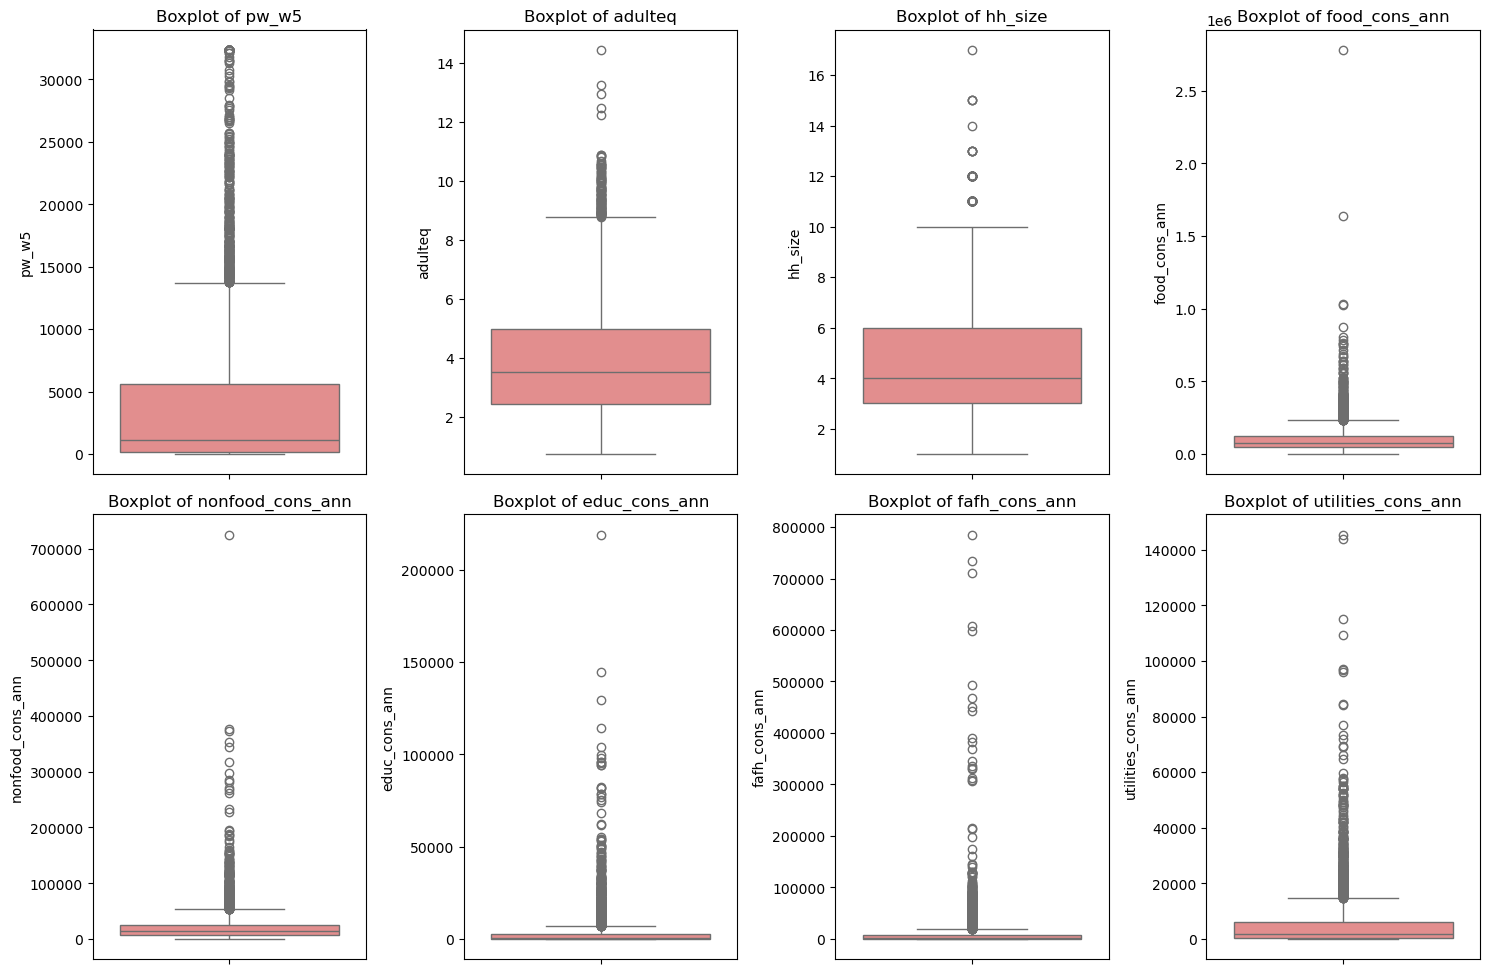

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['pw_w5','adulteq','hh_size','food_cons_ann','nonfood_cons_ann',
            'educ_cons_ann','fafh_cons_ann','utilities_cons_ann']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df_clean[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



In [18]:
outliers_dict = {}

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    outliers_dict[col] = outliers.shape[0]

# Show number of outliers per column
print("Number of outliers per numeric column:")
for col, count in outliers_dict.items():
    print(f"{col}: {count}")


Number of outliers per numeric column:
pw_w5: 405
adulteq: 101
hh_size: 85
food_cons_ann: 292
nonfood_cons_ann: 334
educ_cons_ann: 568
fafh_cons_ann: 575
utilities_cons_ann: 385


In [19]:
# Capping numeric columns
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    # Cap values to the lower and upper bounds
    df_clean[col] = df_clean[col].clip(lower, upper)


In [22]:
import numpy as np

skewed_cols = ['food_cons_ann', 'nonfood_cons_ann', 'educ_cons_ann', 'fafh_cons_ann', 'utilities_cons_ann']

for col in skewed_cols:
    df_clean[col+'_log'] = np.log1p(df_clean[col])


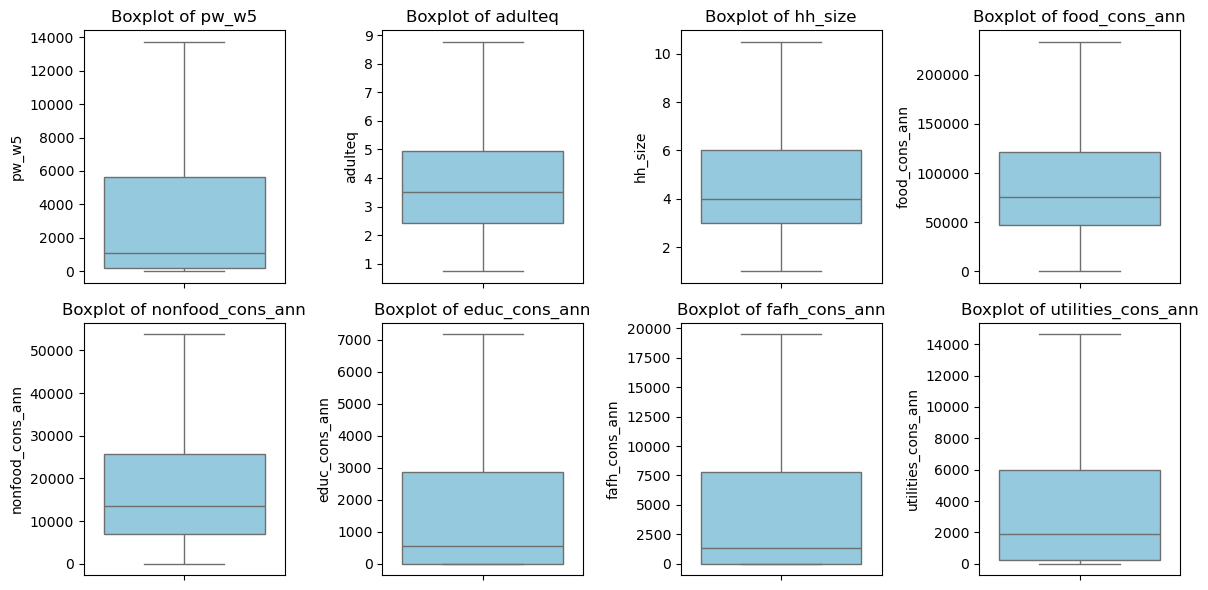

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df_clean[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


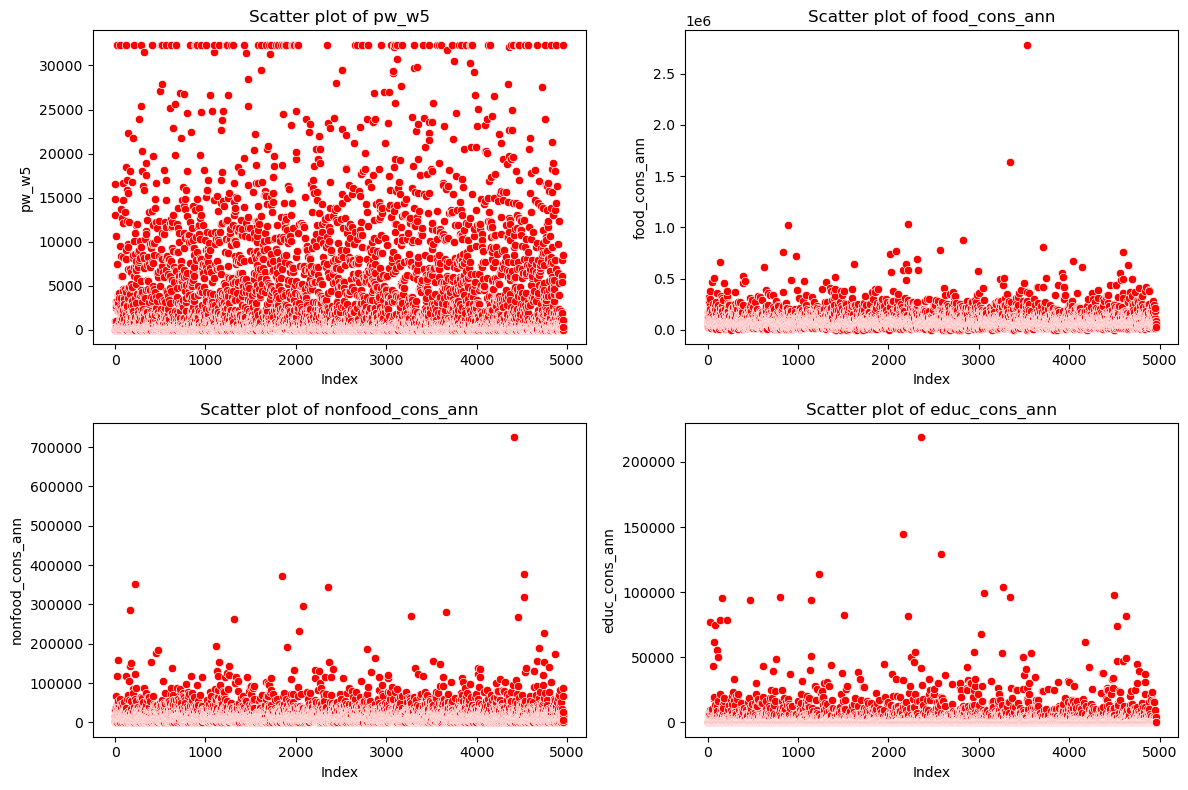

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose df is your DataFrame and you have numeric columns
num_cols = ['pw_w5', 'food_cons_ann', 'nonfood_cons_ann', 'educ_cons_ann']  # replace with your columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df.index, y=df[col], color='red')
    plt.title(f'Scatter plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [39]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Clean column names (remove extra spaces)
df_clean.columns = df_clean.columns.str.strip()

# Step 2: Label encode Urban/Rural
le = LabelEncoder()
df_clean['saq14'] = le.fit_transform(df_clean['saq14'])  # URBAN=1, RURAL=0

# Step 3: One-hot encode Region
# Check if saq01 exists
if 'saq01' in df_clean.columns:
    df_clean = pd.get_dummies(df_clean, columns=['saq01'], drop_first=True)
else:
    print("saq01 is already encoded or not present.")

# Step 4: Check result
bool_cols = df_clean.select_dtypes(include='bool').columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)
print(df_clean.head())


saq01 is already encoded or not present.
   saq14         pw_w5  adulteq  hh_size  food_cons_ann  nonfood_cons_ann  \
0      0     18.223164     3.63      5.0  171236.000000           15920.0   
1      1  12997.873047     1.84      2.0   86476.000000           31864.0   
2      1   1049.566895     1.86      2.0   70044.000000            2160.0   
3      0  13728.064507     2.71      4.0   50570.000000           16532.0   
4      0  13728.064507     2.80      4.0   60884.940613            2520.0   

   educ_cons_ann  fafh_cons_ann  utilities_cons_ann  cons_quint  ...  \
0          900.0              0                5160           5  ...   
1            0.0           9360                3960           5  ...   
2          900.0              0                3840           4  ...   
3            0.0           6240                 300           4  ...   
4           20.0              0                   0           3  ...   

   utilities_cons_ann_log  saq01_AFAR  saq01_AMHARA  saq01_BENI

In [40]:
from sklearn.preprocessing import StandardScaler

num_cols = ['pw_w5','adulteq','hh_size','food_cons_ann','nonfood_cons_ann',
            'educ_cons_ann','fafh_cons_ann','utilities_cons_ann']

scaler = StandardScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

print(df_clean.head())


   saq14     pw_w5   adulteq   hh_size  food_cons_ann  nonfood_cons_ann  \
0      0 -0.773170 -0.082801  0.184349       1.324488         -0.157290   
1      1  2.119680 -1.019474 -1.126939      -0.090629          0.910604   
2      1 -0.543309 -1.009008 -1.126939      -0.364970         -1.078905   
3      0  2.282423 -0.564219 -0.252747      -0.690100         -0.116299   
4      0  2.282423 -0.517124 -0.252747      -0.517886         -1.054793   

   educ_cons_ann  fafh_cons_ann  utilities_cons_ann  cons_quint  ...  \
0      -0.379073      -0.729197            0.272903           5  ...   
1      -0.741914       0.627458            0.014327           5  ...   
2      -0.379073      -0.729197           -0.011531           4  ...   
3      -0.741914       0.175240           -0.774330           4  ...   
4      -0.733851      -0.729197           -0.838974           3  ...   

   utilities_cons_ann_log  saq01_AFAR  saq01_AMHARA  saq01_BENISHANGUL GUMUZ  \
0                8.548886           

In [43]:
print(df_clean[num_cols].describe())



              pw_w5       adulteq       hh_size  food_cons_ann  \
count  4.959000e+03  4.959000e+03  4.959000e+03   4.959000e+03   
mean  -2.794028e-17 -9.456709e-17  5.158205e-17  -4.799996e-17   
std    1.000101e+00  1.000101e+00  1.000101e+00   1.000101e+00   
min   -7.762538e-01 -1.595083e+00 -1.564036e+00  -1.534395e+00   
25%   -7.327965e-01 -7.159708e-01 -6.898433e-01  -7.478452e-01   
50%   -5.302006e-01 -1.403616e-01 -2.527472e-01  -2.677355e-01   
75%    4.732911e-01  6.131634e-01  6.214451e-01   4.987480e-01   
max    2.282423e+00  2.606865e+00  2.588378e+00   2.368638e+00   

       nonfood_cons_ann  educ_cons_ann  fafh_cons_ann  utilities_cons_ann  
count      4.959000e+03   4.959000e+03   4.959000e+03        4.959000e+03  
mean      -9.026859e-17  -8.310441e-17   4.513429e-17        4.370146e-17  
std        1.000101e+00   1.000101e+00   1.000101e+00        1.000101e+00  
min       -1.223577e+00  -7.419144e-01  -7.291970e-01       -8.389740e-01  
25%       -7.610949e-01  

In [44]:
# Mean of each numeric column
print("Mean values:")
print(df_clean[num_cols].mean())

# Standard deviation of each numeric column
print("\nStandard deviation values:")
print(df_clean[num_cols].std())


Mean values:
pw_w5                -2.794028e-17
adulteq              -9.456709e-17
hh_size               5.158205e-17
food_cons_ann        -4.799996e-17
nonfood_cons_ann     -9.026859e-17
educ_cons_ann        -8.310441e-17
fafh_cons_ann         4.513429e-17
utilities_cons_ann    4.370146e-17
dtype: float64

Standard deviation values:
pw_w5                 1.000101
adulteq               1.000101
hh_size               1.000101
food_cons_ann         1.000101
nonfood_cons_ann      1.000101
educ_cons_ann         1.000101
fafh_cons_ann         1.000101
utilities_cons_ann    1.000101
dtype: float64


In [46]:
from sklearn.model_selection import train_test_split

X = df_clean.drop('food_cons_ann', axis=1)  
y = df_clean['food_cons_ann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')



MSE: 0.26
R^2: 0.75


In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Example with your trained model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train performance
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test performance
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.3f}, R²: {r2_train:.3f}")
print(f"Test MSE: {mse_test:.3f}, R²: {r2_test:.3f}")


Train MSE: 0.241, R²: 0.756
Test MSE: 0.262, R²: 0.750


In [50]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize SVR model
svr = SVR(kernel='rbf', C=100, epsilon=0.1)  # You can tune C and epsilon

# Train the model
svr.fit(X_train, y_train)

# Predict
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Evaluate
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.3f}, R²: {r2_train:.3f}")
print(f"Test MSE: {mse_test:.3f}, R²: {r2_test:.3f}")


Train MSE: 0.011, R²: 0.989
Test MSE: 0.016, R²: 0.985


In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors

# Train the model
knn.fit(X_train, y_train)

# Predict
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluate
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.3f}, R²: {r2_train:.3f}")
print(f"Test MSE: {mse_test:.3f}, R²: {r2_test:.3f}")


Train MSE: 0.154, R²: 0.844
Test MSE: 0.235, R²: 0.776
